In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, exp, pi, sin, sqrt

# Constant Acceleration

## Define the Dynamical System

In [2]:
m = 1.00
k = 4*pi*pi
wn = 2*pi
T = 1.0
z = 0.02
wd = wn*sqrt(1-z*z)
c = 2*z*wn*m

### Define the Loading

Our load is

$$p(t) = 1 \text{N} \times \begin{cases}\sin^2\frac{\omega_n}2t&0 \le t \le 5\\0&\text{otherwise}\end{cases}$$

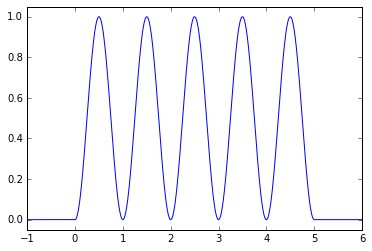

In [3]:
NSTEPS = 200 # steps per second
h = 1.0 / NSTEPS

def load(t):
    return np.where(t<0, 0, np.where(t<5, sin(0.5*wn*t)**2, 0))
t = np.linspace(-1, 6, 7*NSTEPS+1)
plt.plot(t, load(t))
plt.ylim((-0.05, 1.05));

### Numerical Constants

We want to compute, for each step

$$\Delta x = \frac{\Delta p + a^\star a_0 + v^\star v_0}{k^\star}$$

where we see the constants

$$a^\star = 2m, \quad v^\star = 2c + \frac{4m}{h},$$
$$ k^\star = k + \frac{2c}{h} + \frac{4m}{h^2}.$$

In [4]:
kstar = k + 2*c/h + 4*m/h/h
astar = 2*m
vstar = 2*c + 4*m/h

### Vectorize the time and the load

We want to compute the response up to 8 seconds

In [5]:
t  = np.linspace(0, 8+h, NSTEPS*8+2)
P = load(t)
DP = P[+1:]-P[:-1]

## Integration

1. Prepare containers
2. write initial conditions
3. loop on load and load increments
4. vectorize reults

In [6]:
x, v, a = [], [], []
x0, v0 = 0.0, 0.0

for p, dp in zip(P, DP):
    a0 = (p - k*x0 - c*v0)/m
    x.append(x0), v.append(v0), a.append(a0)
    dx = (dp + astar*a0 + vstar*v0)/kstar
    dv = 2*(dx/h-v0)
    x0, v0 = x0+dx, v0+dv
    
x, v = np.array(x), np.array(v)
    

## Results

### The response

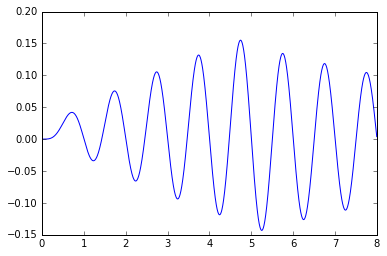

In [7]:
plt.plot(t[:-1],x)

### Comparison

Using black magic it is possible to divine the analytical expression of the response during the forced phase,

$$x(t) = \frac1{2k}\left(\left(\frac{1-2\zeta^2}{2\zeta\sqrt{1-\zeta^2}}\sin\omega_Dt-\cos\omega_Dt\right)\exp(-\zeta\omega_nt)+1-\frac{1}{2\zeta}\sin\omega_nt\right), \qquad 0\le t \le 5.$$

and hence plot a comparison within the exact response and the (downsampled) numerical approximation, in the range of validity of the exact response.

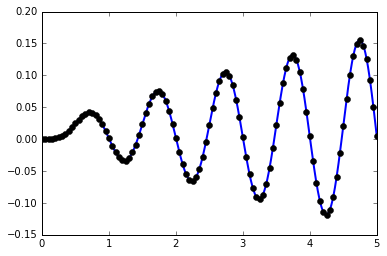

In [8]:
xe = (((1 - 2*z**2)*sin(wd*t) / (2*z*sqrt(1-z*z)) - cos(wd*t)) *exp(-z*wn*t) + 1. - sin(wn*t)/(2*z))/2/k

plt.plot(t[:1001], xe[:1001], lw=2)
plt.plot(t[:1001:10], x[:1001:10], 'ko')

Eventually we plot the difference between exact and approximate response,

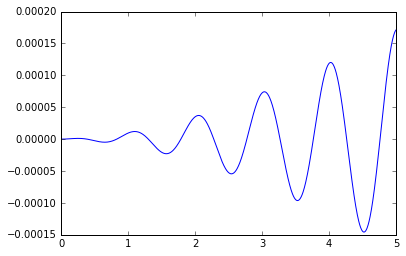

In [9]:
plt.plot(t[:1001], x[:1001]-xe[:1001])